In [1]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

os.chdir('../..')

In [2]:
from textlong import ContentNode

## State

### 模拟内容节点

In [3]:
detail_node = ContentNode(index=1)

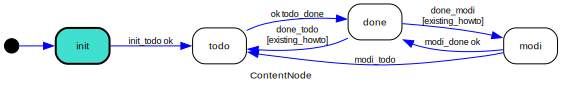

In [4]:
detail_node

In [5]:
print(detail_node)

<ContentNode id:1, children:[]>


In [6]:
detail_node.last_ai_reply_json = {
    "标题名称": "遇到小兔子",
    "总字数要求": 400,
    "扩写指南": "请以公园偶遇为题"
}
detail_node.init_todo()

<#init> ok


In [7]:
detail_node.type

'paragraph'

In [8]:
detail_node.title

'遇到小兔子'

In [9]:
detail_node.last_ai_reply_json = {
    "内容摘要": "你行你上",
    "详细内容": "来来来，你行你上",
}
detail_node.todo_done()

<#todo> ok


In [10]:
print(detail_node.summarise)

你行你上


In [11]:
detail_node.state

'done'

### 模拟大纲节点

In [12]:
outline_node = ContentNode(index=0)

In [13]:
outline_node.last_ai_reply_json = {
    "标题名称": "一篇小作文",
    "总字数要求": 800,
    "扩写指南": "请好好写"
}
outline_node.init_todo()

<#init> ok


In [14]:
outline_node.type

'outline'

In [15]:
outline_node.state

'todo'

In [16]:
outline_node.content

{'id': '0',
 'type': 'outline',
 'state': 'todo',
 'is_complete': False,
 'words_advice': 800,
 'title': '一篇小作文',
 'howto': '请好好写',
 'summarise': None,
 'text': ''}

### 内容属性

In [17]:
detail_node._parent = outline_node
outline_node._children['1'] = detail_node
outline_node._children

{'1': ContentNode(model=Model(state=done), state_field='state', current_state='s_done')}

In [18]:
f"{detail_node}"

'<ContentNode id:0.1, children:[]>'

In [20]:
todo_node = outline_node.find_not_complete_node()
print(todo_node)

<ContentNode id:0, children:['<id:0.1>']>


In [21]:
outline_node.all_content

[{'id': '0',
  'type': 'outline',
  'state': 'todo',
  'is_complete': False,
  'words_advice': 800,
  'title': '一篇小作文',
  'howto': '请好好写',
  'summarise': None,
  'text': ''},
 {'id': '0.1',
  'type': 'paragraph',
  'state': 'done',
  'is_complete': True,
  'words_advice': 400,
  'title': '遇到小兔子',
  'howto': '请以公园偶遇为题',
  'summarise': '你行你上',
  'text': '来来来，你行你上'}]

In [22]:
print(outline_node.all_outlines)

0 一篇小作文 
  扩写指南 >>> 请好好写
  内容摘要 >>> None
0.1 遇到小兔子 
  扩写指南 >>> 请以公园偶遇为题
  内容摘要 >>> 你行你上


In [23]:
detail_node.content

{'id': '0.1',
 'type': 'paragraph',
 'state': 'done',
 'is_complete': True,
 'words_advice': 400,
 'title': '遇到小兔子',
 'howto': '请以公园偶遇为题',
 'summarise': '你行你上',
 'text': '来来来，你行你上'}

In [24]:
print(outline_node.all_text)

0 一篇小作文 
 
0.1 遇到小兔子 
 来来来，你行你上


## 指令

- ask: 从AI生成（`init`，`todo`, `modi`）
- ok: 执行状态转移（`init`->`todo`->`done`）

### 直接创作段落短文

In [25]:
root = ContentNode()

In [27]:
root.commands

['task', 'ok']

In [28]:
root.invoke("请帮我写一篇20字的诗歌")

```json
{
    "总字数要求": 20,
    "标题名称": "短歌",
    "扩写指南": "创作一首包含深刻意义，且字数限制在20字内的短诗歌。"
}
```


{'command': 'task',
 'args': '请帮我写一篇20字的诗歌',
 'reply': {'总字数要求': 20, '标题名称': '短歌', '扩写指南': '创作一首包含深刻意义，且字数限制在20字内的短诗歌。'}}

In [29]:
root.invoke("ok")

<#init> ok


{'command': 'ok', 'args': '', 'reply': 'todo'}

In [30]:
root.commands

['title', 'words_advice', 'howto', 'summarise', 'text', 'task', 'ok']

In [31]:
root.invoke("task")

```json
{
    "详细内容": "岁月如梭人易老，花开花落意难留。",
    "内容摘要": "简短的诗句表达了时光流逝，生命易老的感慨，以及对美好事物无法永驻的哀愁。"
}
```


{'command': 'task',
 'args': '',
 'reply': {'详细内容': '岁月如梭人易老，花开花落意难留。',
  '内容摘要': '简短的诗句表达了时光流逝，生命易老的感慨，以及对美好事物无法永驻的哀愁。'}}

In [32]:
root.invoke("ok")

<#todo> ok


{'command': 'ok', 'args': '', 'reply': 'done'}

In [33]:
print(root.all_outlines)
print("-"*20)
print(root.all_text)

0 短歌 
  扩写指南 >>> 创作一首包含深刻意义，且字数限制在20字内的短诗歌。
  内容摘要 >>> 简短的诗句表达了时光流逝，生命易老的感慨，以及对美好事物无法永驻的哀愁。
--------------------
0 短歌 
 岁月如梭人易老，花开花落意难留。


In [34]:
root.howto

'创作一首包含深刻意义，且字数限制在20字内的短诗歌。'

In [35]:
root._children

{}

### 创作大纲和段落

In [3]:
root = ContentNode()
root.invoke("我不该扒好朋友二牛的裤子，请帮我写一篇1000字的道歉信")

```json
{
    "总字数要求": 1000,
    "标题名称": "致二牛的诚恳道歉信",
    "扩写指南": "本文为一封道歉信，需要表达出深刻的歉意和后悔，承认错误的同时，也要体现出对二牛的尊重和关心。信中应当详细描述事件的经过，解释原因，但不过分辩解，重点放在道歉及承诺改正上。"
}
```


{'command': 'task',
 'args': '我不该扒好朋友二牛的裤子，请帮我写一篇1000字的道歉信',
 'reply': {'总字数要求': 1000,
  '标题名称': '致二牛的诚恳道歉信',
  '扩写指南': '本文为一封道歉信，需要表达出深刻的歉意和后悔，承认错误的同时，也要体现出对二牛的尊重和关心。信中应当详细描述事件的经过，解释原因，但不过分辩解，重点放在道歉及承诺改正上。'}}

In [6]:
root.invoke("ok")

<#init> ok


{'command': 'ok', 'args': '', 'reply': 'todo'}

In [7]:
print(root.find_draft_node())

None


In [8]:
root.invoke("task")

```json
{
    "大纲列表": [
        {
            "总字数要求": 250,
            "标题名称": "事件的回顾与承认错误",
            "扩写指南": "详细描述事件的经过，承认错误，表达出深深的歉意和后悔。"
        },
        {
            "总字数要求": 250,
            "标题名称": "对二牛的尊重与关心",
            "扩写指南": "表达对二牛的尊重和关心，认识到行为的不当给二牛带来的影响。"
        },
        {
            "总字数要求": 250,
            "标题名称": "深刻反省与承诺改正",
            "扩写指南": "进行深刻反省，承诺采取具体措施改正错误，并确保类似事件不再发生。"
        },
        {
            "总字数要求": 250,
            "标题名称": "请求原谅与未来展望",
            "扩写指南": "请求二牛的宽恕，表达对未来关系的期待和愿意为之努力的决心。"
        }
    ]
}
```


{'command': 'task',
 'args': '',
 'reply': {'大纲列表': [{'总字数要求': 250,
    '标题名称': '事件的回顾与承认错误',
    '扩写指南': '详细描述事件的经过，承认错误，表达出深深的歉意和后悔。'},
   {'总字数要求': 250,
    '标题名称': '对二牛的尊重与关心',
    '扩写指南': '表达对二牛的尊重和关心，认识到行为的不当给二牛带来的影响。'},
   {'总字数要求': 250,
    '标题名称': '深刻反省与承诺改正',
    '扩写指南': '进行深刻反省，承诺采取具体措施改正错误，并确保类似事件不再发生。'},
   {'总字数要求': 250,
    '标题名称': '请求原谅与未来展望',
    '扩写指南': '请求二牛的宽恕，表达对未来关系的期待和愿意为之努力的决心。'}]}}

In [9]:
print(root.find_draft_node())

<ContentNode id:0, children:[]>


In [10]:
root.invoke("task 分为两段即可")

```json
{
    "大纲列表": [
        {
            "总字数要求": 500,
            "标题名称": "错误行为的承认与反省",
            "扩写指南": "详细描述事件的经过，深刻反省自己的错误行为，表达歉意和后悔，并承诺改正。"
        },
        {
            "总字数要求": 500,
            "标题名称": "对二牛的尊重与请求原谅",
            "扩写指南": "表达对二牛的尊重和关心，请求二牛的宽恕，并展望未来如何修复和保持良好的关系。"
        }
    ]
}
```


{'command': 'task',
 'args': '分为两段即可',
 'reply': {'大纲列表': [{'总字数要求': 500,
    '标题名称': '错误行为的承认与反省',
    '扩写指南': '详细描述事件的经过，深刻反省自己的错误行为，表达歉意和后悔，并承诺改正。'},
   {'总字数要求': 500,
    '标题名称': '对二牛的尊重与请求原谅',
    '扩写指南': '表达对二牛的尊重和关心，请求二牛的宽恕，并展望未来如何修复和保持良好的关系。'}]}}

In [40]:
root.invoke("ok")

<#todo> ok


{'command': 'ok', 'args': '', 'reply': 'done'}

In [41]:
print(root.all_outlines)

0 致二牛的诚挚道歉信 
  扩写指南 >>> 本文主要围绕道歉主题，详细描述事件经过、自己的错误以及给朋友带来的影响，同时表达深刻的悔意和改正错误的决心。文中应提及具体的事件背景，以及与二牛的关系，确保内容真实、感情真挚。
  内容摘要 >>> None
0.1 事件经过与反省 
  扩写指南 >>> 详细描述在一次聚会上的不当行为，扒下二牛的裤子，并深入反省这一行为的不妥之处和对二牛的伤害，表达诚挚的歉意和自责。
  内容摘要 >>> None
0.2 悔意与改正承诺 
  扩写指南 >>> 阐述自己的悔意，承诺将采取措施避免类似事件再次发生，并请求二牛的宽恕，希望两人的友情能够得以修复和加强。
  内容摘要 >>> None


In [42]:
print(root.all_text)

0 致二牛的诚挚道歉信 
 
0.1 事件经过与反省 
 
0.2 悔意与改正承诺 
 


In [44]:
print(root.find_not_complete_node())

<ContentNode id:0.1, children:[]>


In [13]:
root.all_content

[{'id': '0',
  'type': 'outline',
  'state': 'todo',
  'is_complete': False,
  'words_advice': 1000,
  'title': '致二牛的诚恳道歉信',
  'howto': '本文为一封道歉信，需要表达出深刻的歉意和后悔，承认错误的同时，也要体现出对二牛的尊重和关心。信中应当详细描述事件的经过，解释原因，但不过分辩解，重点放在道歉及承诺改正上。',
  'summarise': None,
  'text': ''}]